# **The dataset was on black-white body Marker which is here labeled as marker**

### Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [ ]:
!nvidia-smi

Wed Jan 29 12:23:06 2025       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

**NOTE:** To make it easier for us to manage datasets, images and models we create a `HOME` constant.

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLO11 via Ultralytics

In [ ]:
%pip install "ultralytics<=8.3.40" supervision roboflow
import ultralytics
ultralytics.checks()

Ultralytics 8.3.40 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 31.2/112.6 GB disk)


## Fine-tune YOLO11 on custom dataset

**NOTE:** When training YOLOv11, make sure your data is located in `datasets`. If you'd like to change the default location of the data you want to use for fine-tuning, you can do so through Ultralytics' `settings.json`. In this tutorial, we will use one of the [datasets](https://universe.roboflow.com/liangdianzhong/-qvdww) available on [Roboflow Universe](https://universe.roboflow.com/). When downloading, make sure to select the `yolov11` export format.

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="S0VKKXBW0LjyG69ulAUv")
project = rf.workspace("firsttest-p8lcr").project("marker-aylda")
version = project.version(5)
dataset = version.download("yolov11")



/content/datasets
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to marker-5 in yolov11:: 100%|██████████| 584/584 [00:00<00:00, 1867.23it/s]


## Custom Training

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolo11s.pt data={dataset.location}/data.yaml epochs=10 imgsz=640 plots=True

/content
100% 18.4M/18.4M [00:00<00:00, 178MB/s]
New https://pypi.org/project/ultralytics/8.3.69 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.40 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11s.pt, data=/content/datasets/marker-5/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=Non

**NOTE:** The results of the completed training are saved in `{HOME}/runs/detect/train/`. Let's examine them.

In [ ]:
!ls {HOME}/runs/detect/train/

args.yaml					    labels.jpg	  train_batch0.jpg
confusion_matrix_normalized.png			    P_curve.png   train_batch1.jpg
confusion_matrix.png				    PR_curve.png  train_batch2.jpg
events.out.tfevents.1738153433.f961cb692ddb.1577.0  R_curve.png   val_batch0_labels.jpg
F1_curve.png					    results.csv   val_batch0_pred.jpg
labels_correlogram.jpg				    results.png   weights


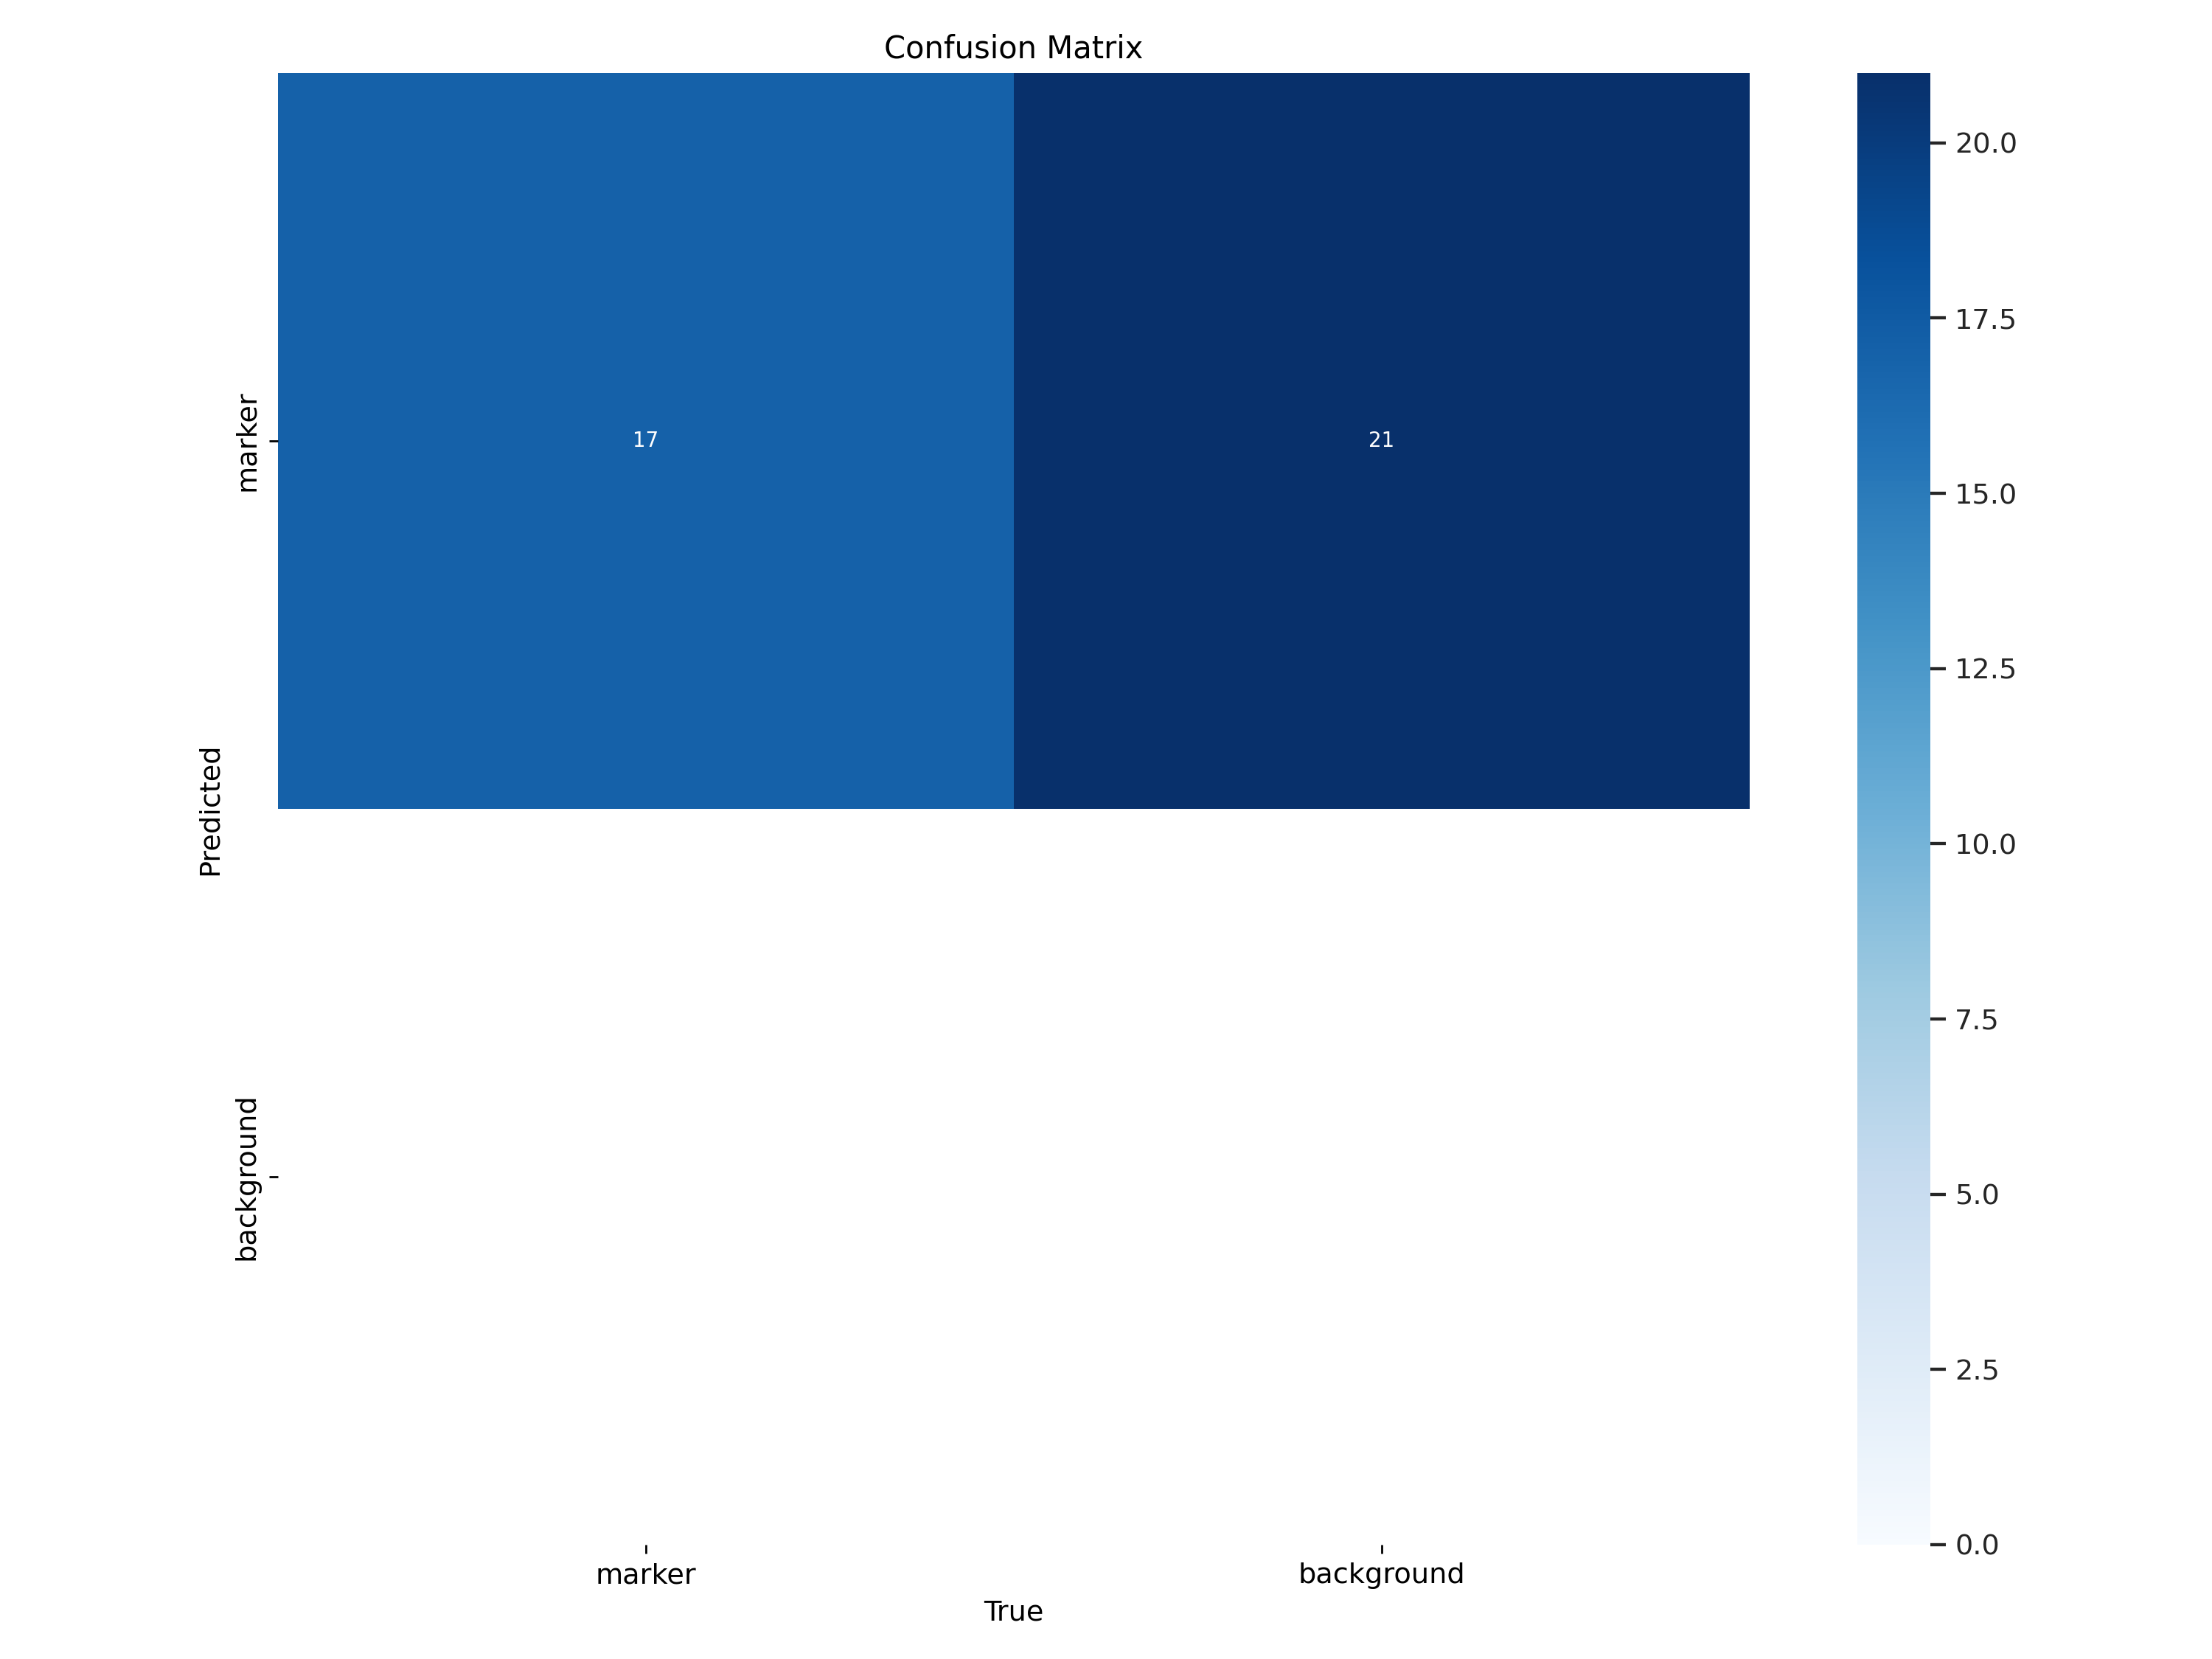

In [ ]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

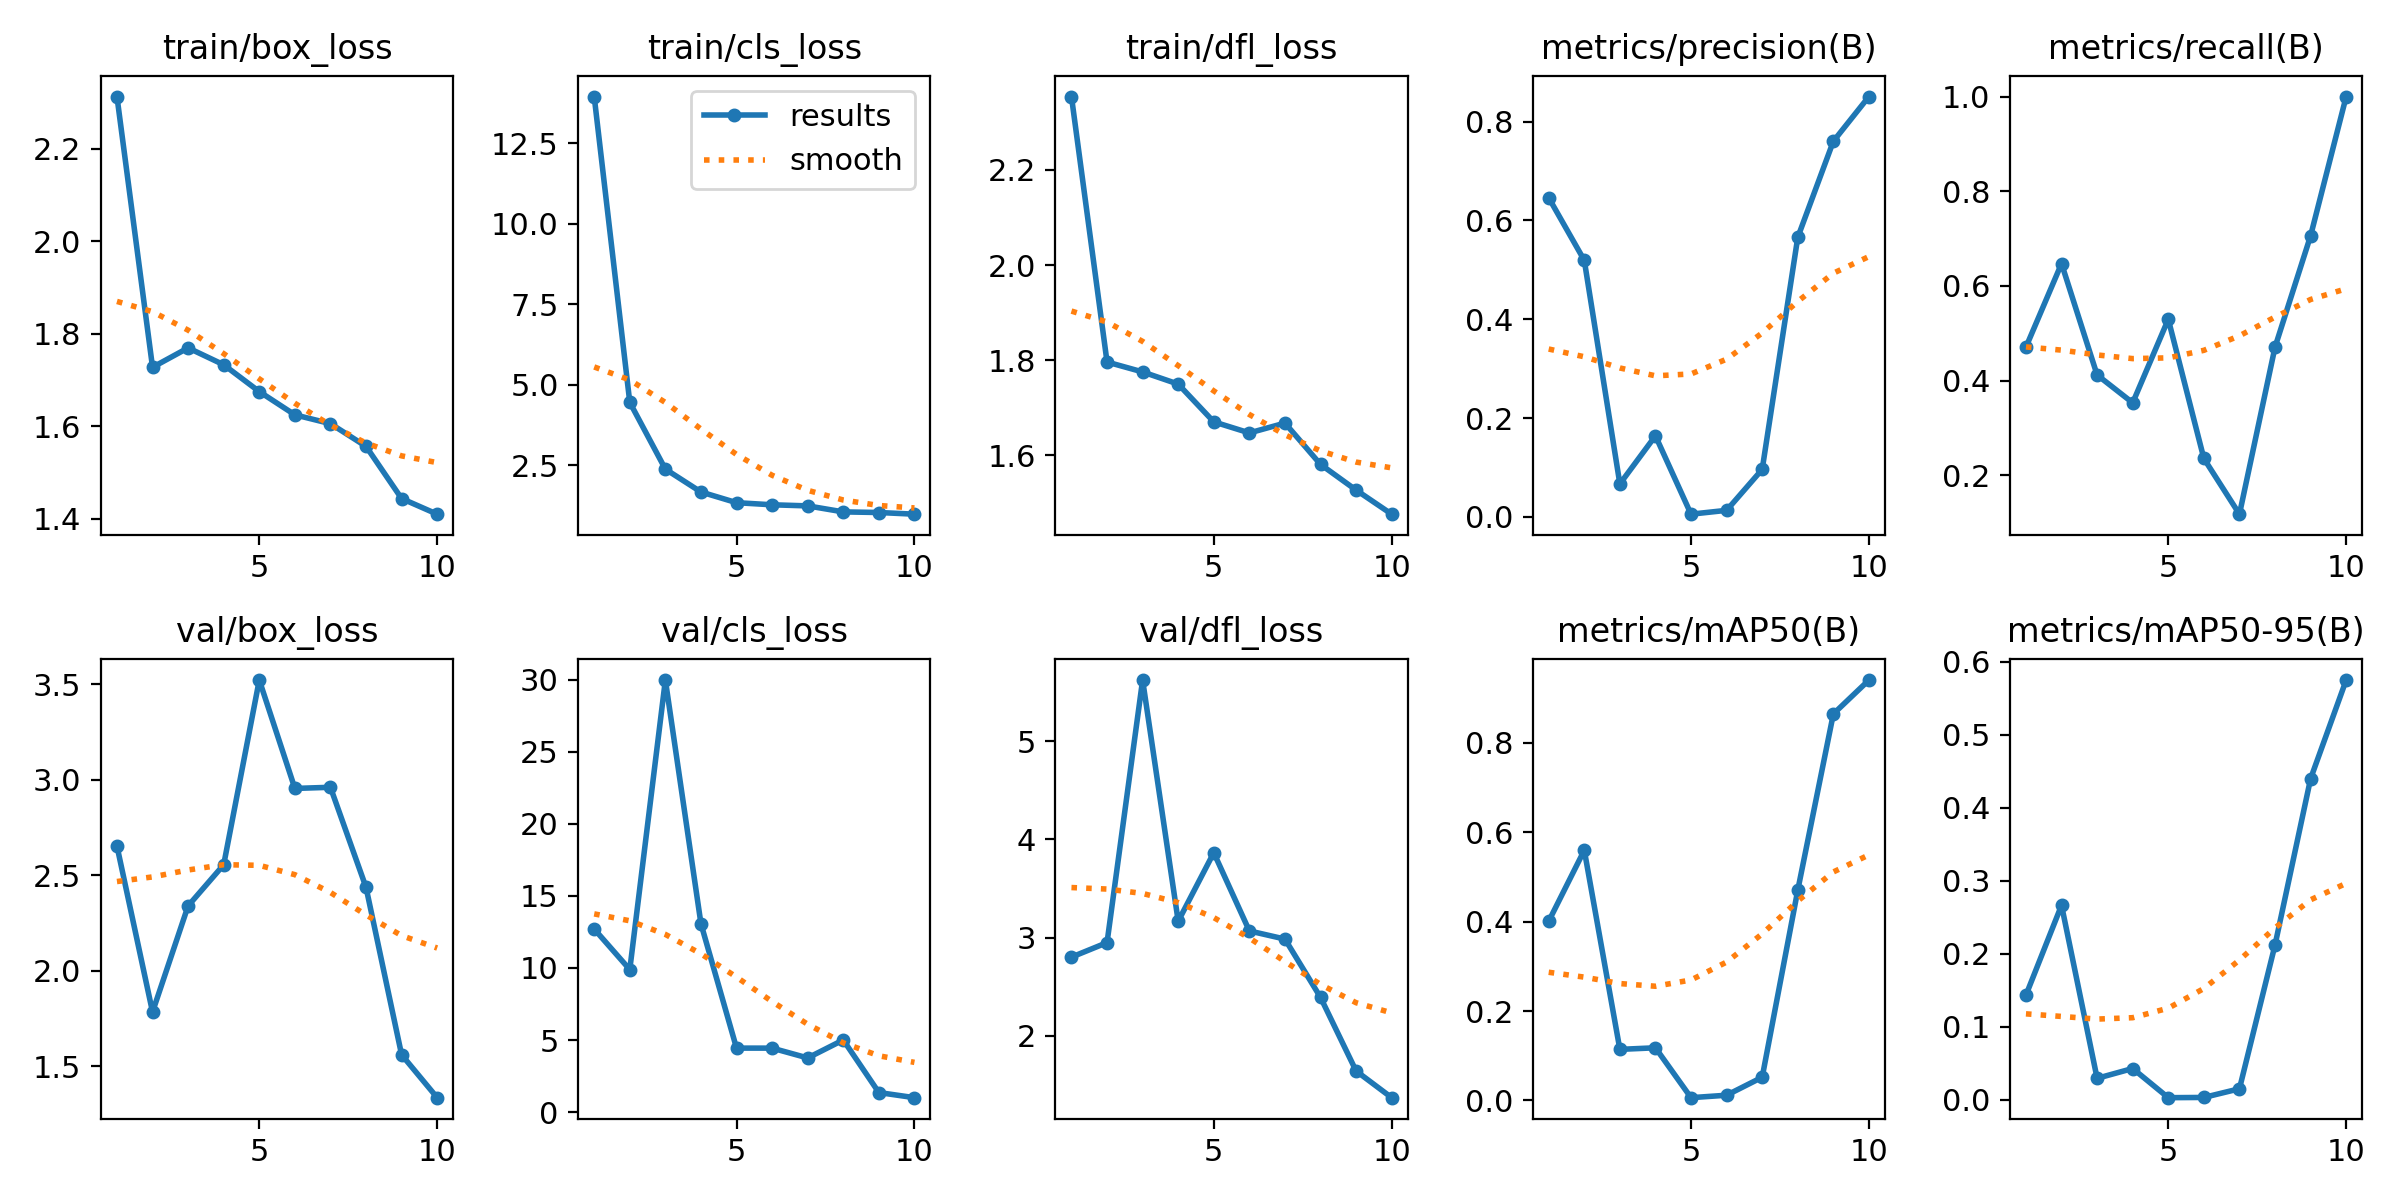

In [ ]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/results.png', width=600)

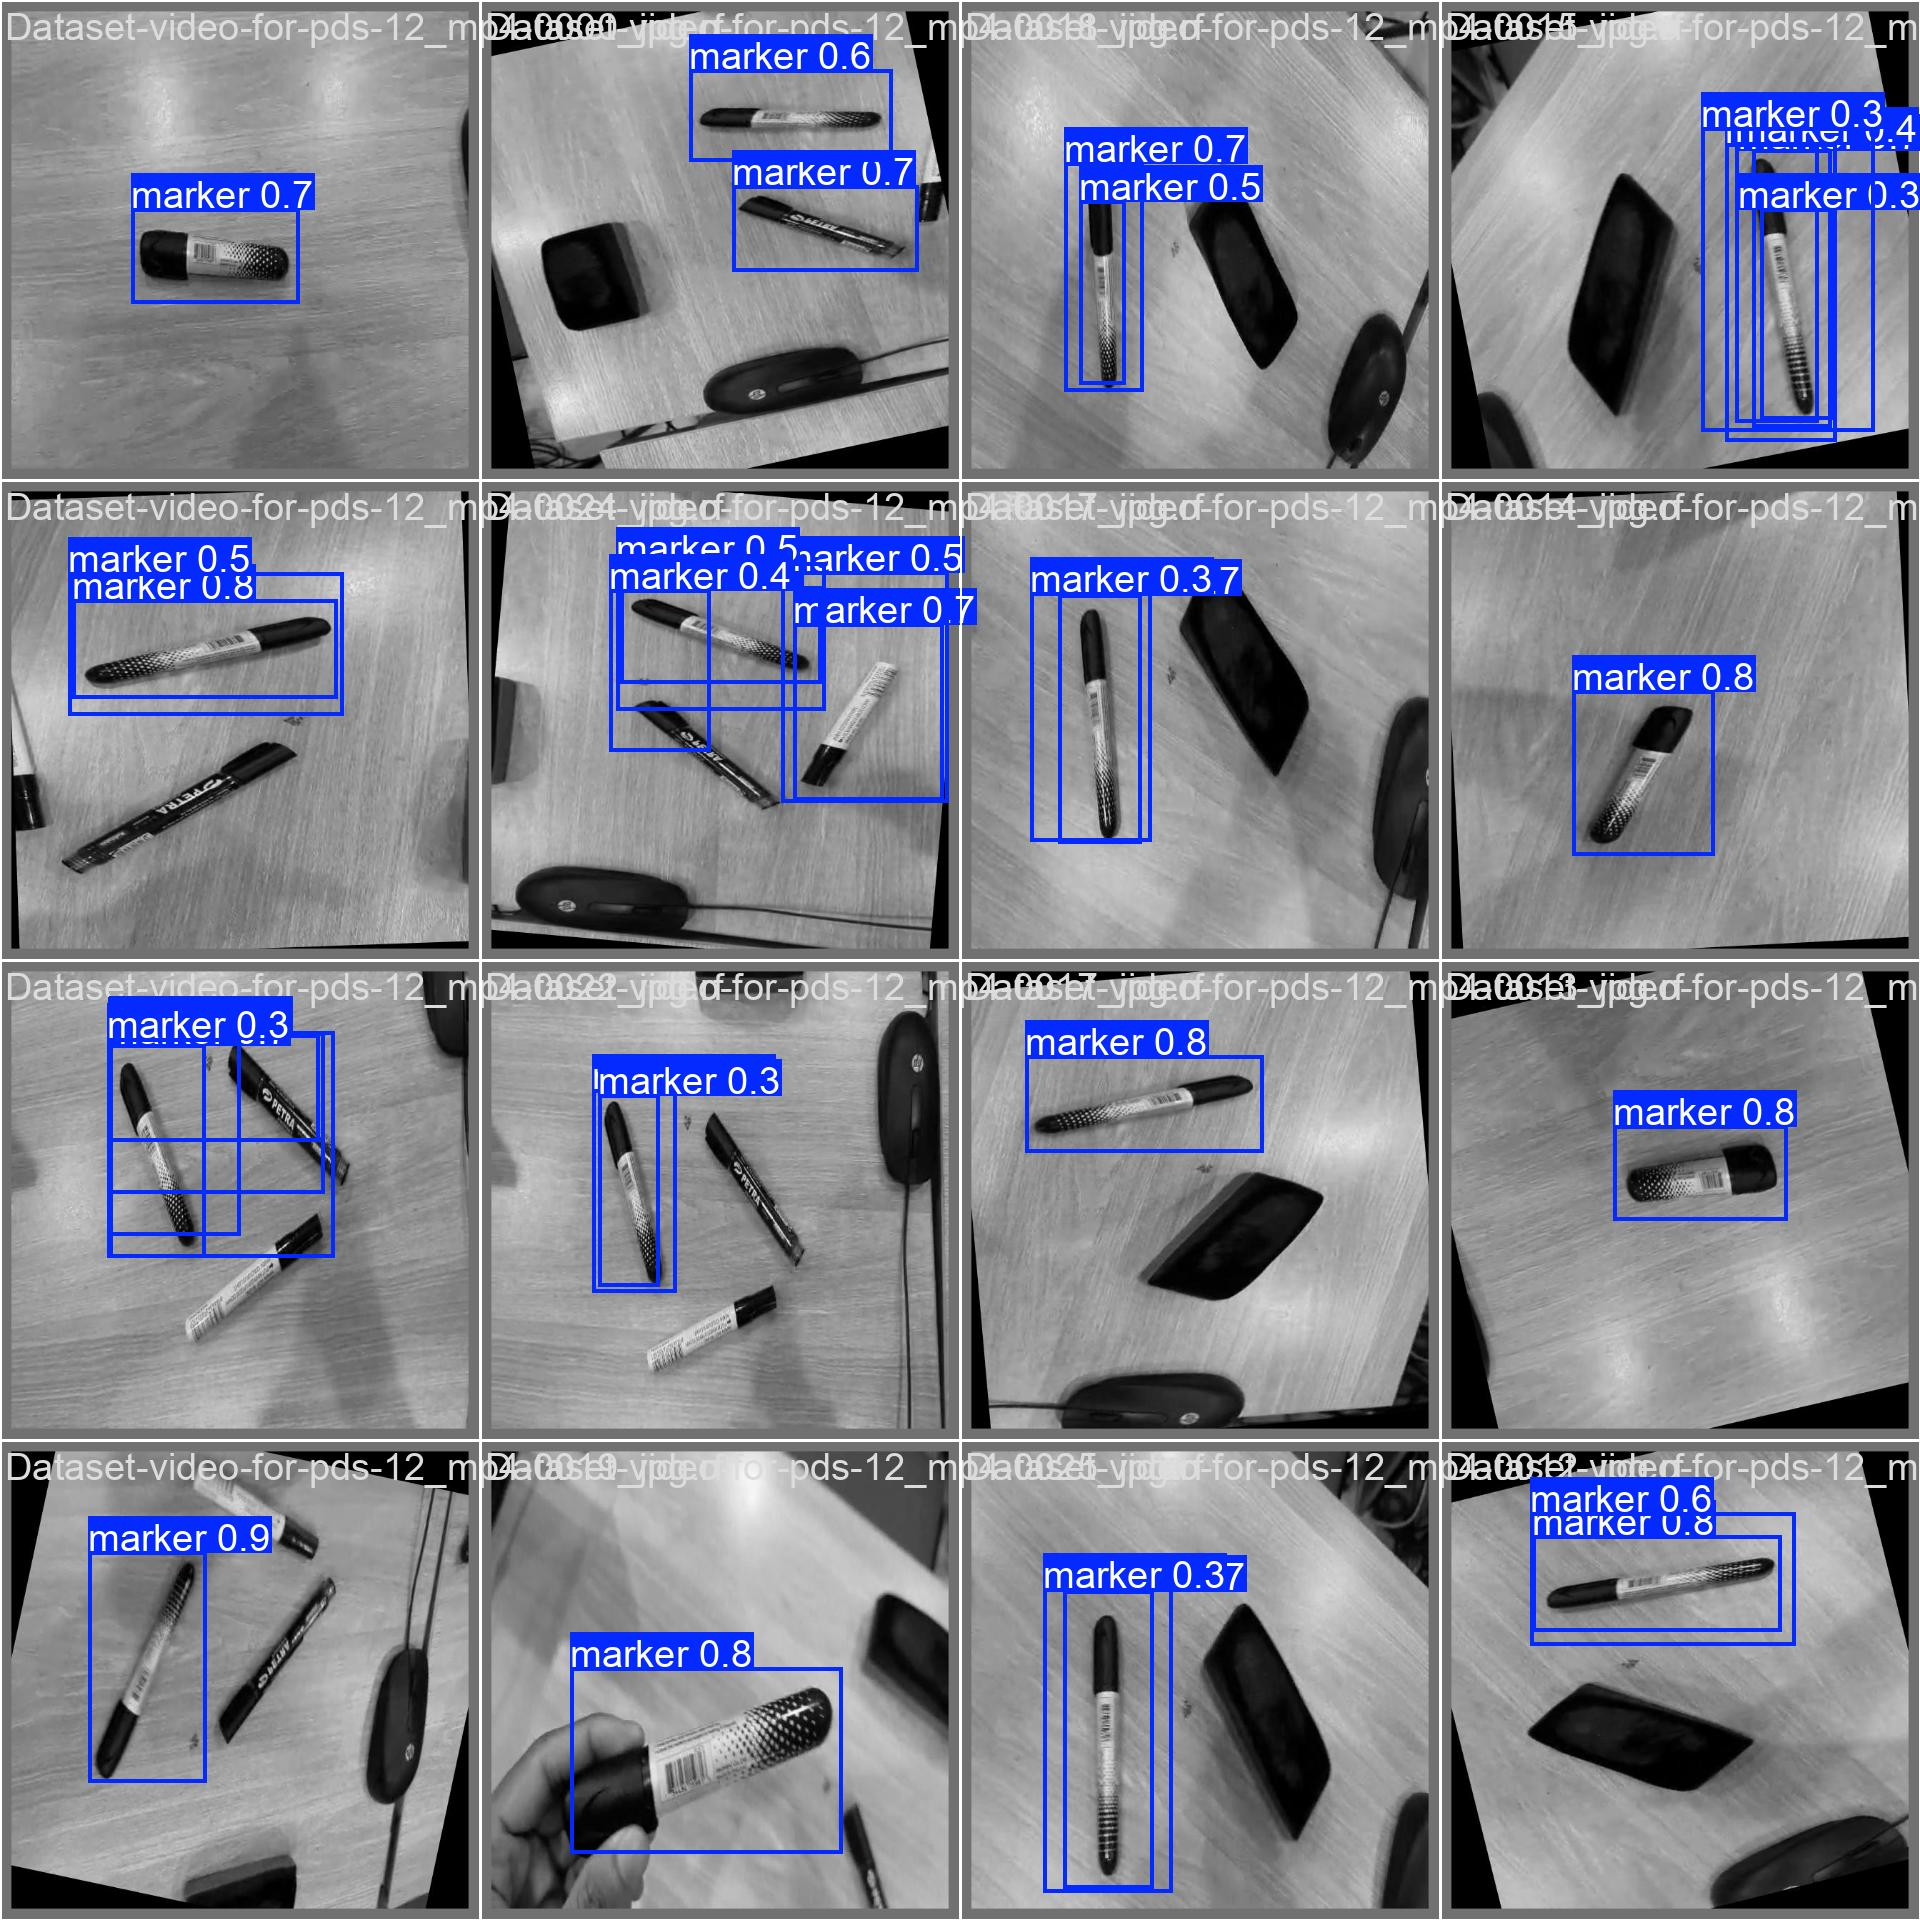

In [ ]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

## Validate fine-tuned model

In [ ]:
!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

Ultralytics 8.3.40 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11s summary (fused): 238 layers, 9,413,187 parameters, 0 gradients, 21.3 GFLOPs
val: Scanning /content/datasets/marker-5/valid/labels.cache... 17 images, 0 backgrounds, 0 corrupt: 100% 17/17 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 2/2 [00:02<00:00,  1.40s/it]
                   all         17         17      0.851          1       0.94      0.575
Speed: 11.4ms preprocess, 35.0ms inference, 0.0ms loss, 98.4ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


## Inference with custom model

In [ ]:
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

Ultralytics 8.3.40 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11s summary (fused): 238 layers, 9,413,187 parameters, 0 gradients, 21.3 GFLOPs

image 1/8 /content/datasets/marker-5/test/images/Dataset-video-for-pds-12_mp4-0001_jpg.rf.b08bd6a17d7ea39adbf40ebf2459f5ec.jpg: 640x640 1 marker, 15.5ms
image 2/8 /content/datasets/marker-5/test/images/Dataset-video-for-pds-12_mp4-0004_jpg.rf.73c0dec5a10839be4469e541c0637391.jpg: 640x640 1 marker, 15.6ms
image 3/8 /content/datasets/marker-5/test/images/Dataset-video-for-pds-12_mp4-0006_jpg.rf.592665d9b346685e6d48bdfeedfa74ef.jpg: 640x640 1 marker, 15.5ms
image 4/8 /content/datasets/marker-5/test/images/Dataset-video-for-pds-12_mp4-0007_jpg.rf.cd5bf54367d358b02d4d1820d2b9d8f2.jpg: 640x640 1 marker, 15.5ms
image 5/8 /content/datasets/marker-5/test/images/Dataset-video-for-pds-12_mp4-0023_jpg.rf.c295b4d3c232711cfa16ec11f65e3ea4.jpg: 640x640 3 markers, 15.5ms
image 6/8 /content/datasets/marker-5/test/images/Dataset-video-for-

**NOTE:** Let's take a look at few results.

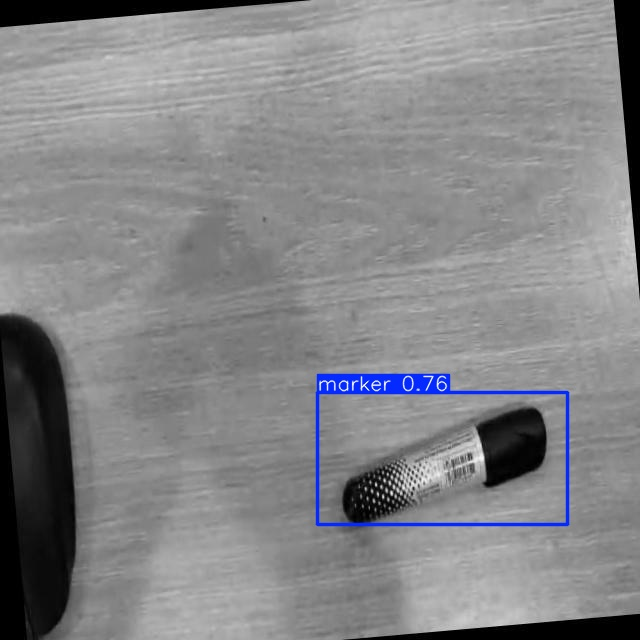

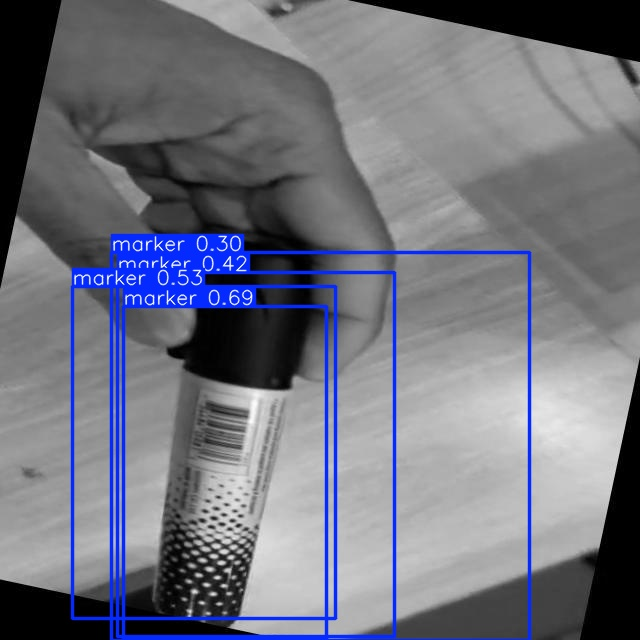

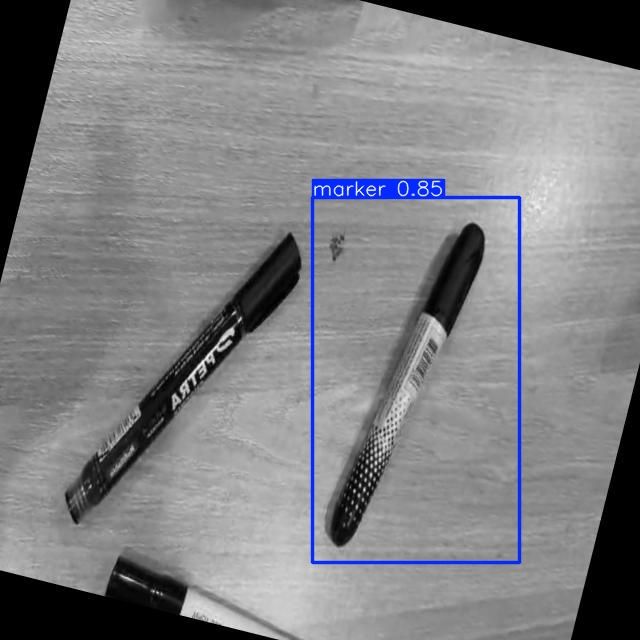

In [ ]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob(f'{HOME}/runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[:3]:
    display(IPyImage(filename=img, width=600))
    print("\n")

## Export model in tfjs format

In [ ]:
# !yolo task=detect mode=export model={HOME}/runs/detect/train/weights/best.pt format=tfjs save=True

In [ ]:
!yolo export task=detect model={HOME}/runs/detect/train/weights/best.pt format=tfjs save=True

Ultralytics 8.3.40 🚀 Python-3.11.11 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
YOLO11s summary (fused): 238 layers, 9,413,187 parameters, 0 gradients, 21.3 GFLOPs

PyTorch: starting from '/content/runs/detect/train/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 5, 8400) (18.3 MB)
E0000 00:00:1738153886.056268    3778 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1738153886.061463    3778 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered

TensorFlow SavedModel: starting export with tensorflow 2.18.0...

ONNX: starting export with onnx 1.17.0 opset 19...
ONNX: slimming with onnxslim 0.1.48...
ONNX: export success ✅ 3.4s, saved as '/content/runs/detect/train/weights/best.onnx' (36.2 MB)
TensorFlow SavedModel: starting TFLite export with onnx2tf 1.22.3...
I0000 00:00:

## Zip the TFJS model
 and  download in your computer

In [ ]:
import shutil

folder_path = "/content/runs/detect/train/weights/best_web_model"
zip_path = "./tfjs_model.zip"
shutil.make_archive(zip_path.replace(".zip", ""), 'zip', folder_path)

'/content/tfjs_model.zip'